In [1]:
% pip install pyvs

  Obtaining dependency information for pyvis from https://files.pythonhosted.org/packages/ab/4b/e37e4e5d5ee1179694917b445768bdbfb084f5a59ecd38089d3413d4c70f/pyvis-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for jsonpickle>=1.4.1 from https://files.pythonhosted.org/packages/a1/64/815460f86d94c9e1431800a75061719824c6fef14d88a6117eba3126cd5b/jsonpickle-4.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [5]:
def drawNetwork(g, name):
    n = Network(height=800, width=800, notebook=True)
    n.toggle_hide_edges_on_drag(False)
    n.barnes_hut()
    n.from_nx(g)
    n.show(name + ".html")

In [6]:
M_BA = 3
P_ER = 0.4

def initGraph():
    g = nx.Graph()

    g.add_node("v1")
    g.add_node("v2")
    g.add_node("v3")
    g.add_node("v4")

    g.add_edge("v1", "v2")
    g.add_edge("v2", "v3")
    g.add_edge("v3", "v4")
    g.add_edge("v4", "v1")
    g.add_edge("v1", "v3")

    return g

def addVertexBA(g):
    vrtx = list(g.nodes())
    e = len(g.edges()) / 2
    nodeName = "v" + str(len(g.nodes()) + 1)
    probs = [deg / e for (_, deg) in g.degree()]
    chosenVrtx = set()

    m = M_BA
    if len(vrtx) < m:
        m = len(vrtx)

    while True:
        if len(chosenVrtx) == m:
            break

        choice = random.choices(vrtx, weights=probs, k=1)[0]
        chosenVrtx.add(choice)

    g.add_node(nodeName)

    for v in chosenVrtx:
        g.add_edge(nodeName, v)

def addVertexER(g):
    vrtx = list(g.nodes())
    nodeName = "v" + str(len(g.nodes()) + 1)


    g.add_node(nodeName)

    for v in vrtx:
        if random.random() < P_ER:
            g.add_edge(nodeName, v)


In [7]:
keySteps = [2, 4, 6, 10, 20, 50, 100, 200, 400, 700, 1000]
gBA = initGraph()

drawNetwork(gBA, "init_ba")
for i in range(1001):
    addVertexBA(gBA)
    if i in keySteps:
        drawNetwork(gBA, "new_ba_"+str(i))

init_ba.html
new_ba_2.html
new_ba_4.html
new_ba_6.html
new_ba_10.html
new_ba_20.html
new_ba_50.html
new_ba_100.html
new_ba_200.html
new_ba_400.html
new_ba_700.html
new_ba_1000.html


In [8]:
gER = initGraph()

drawNetwork(gER, "init_er")
for i in range(201):
    addVertexER(gER)
    if i in keySteps:
        drawNetwork(gER, "new_er_"+str(i))

init_er.html
new_er_2.html
new_er_4.html
new_er_6.html
new_er_10.html
new_er_20.html
new_er_50.html
new_er_100.html
new_er_200.html


In [9]:
def expProb(p, dist):
    return np.exp(-p * dist)

def powProb(p, dist):
    return dist ** (-p)

def linProb(p, dist):
    return max(0, 1 - p * dist)

def weakify(g, p, probFn, edgeCount):
    nodes = list(g.nodes())
    size = len(nodes)

    for i in range(size):
        for j in range(i + 1, size):
            if not g.has_edge(nodes[i], nodes[j]):
                distance = nx.shortest_path_length(g,nodes[i], nodes[j])

                p = probFn(p, distance)

                # Створення слабкого зв'язку з розрахованою ймовірністю
                if np.random.random() < p:
                    g.add_edge(nodes[i], nodes[j])

                    edgeCount -= 1

                    if edgeCount == 0:
                        return

def detectWeakness(g, weaknessThreshold):
    eb = nx.edge_betweenness_centrality(g)
    threshold_value = np.percentile(list(eb.values()), weaknessThreshold * 100)
    return [(u, v) for (u, v), score in eb.items() if score < threshold_value]

In [11]:
def plotDegreeDist(G):
    degrees = [d for n, d in G.degree()]
    plt.hist(degrees, bins=max(degrees), align='left')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()

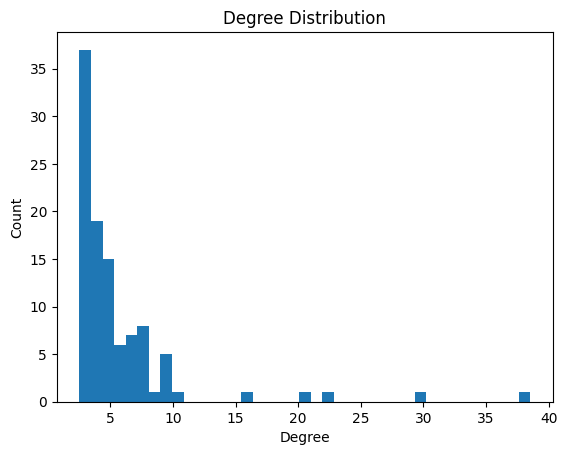

before_w.html


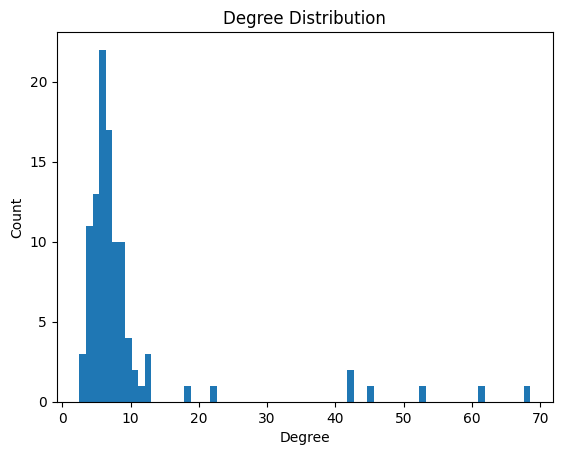

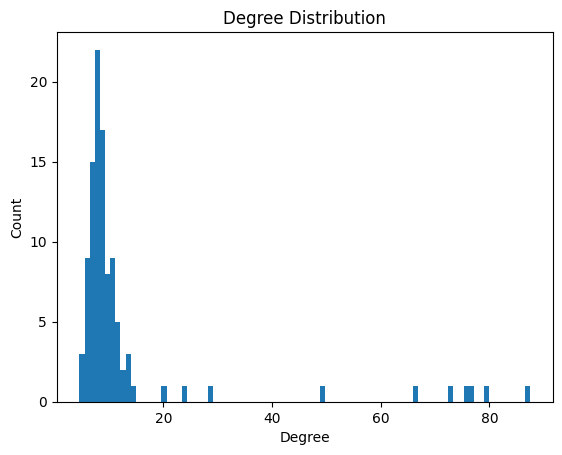

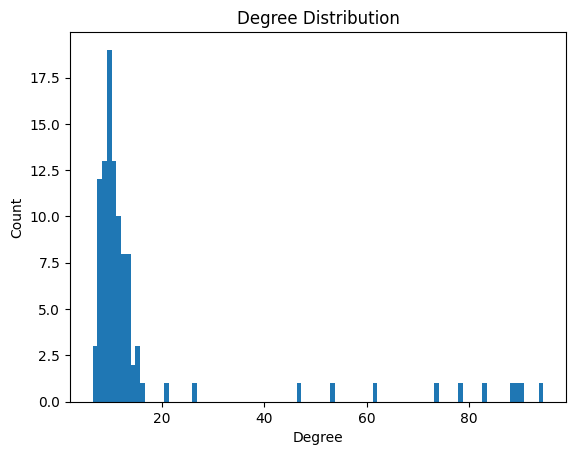

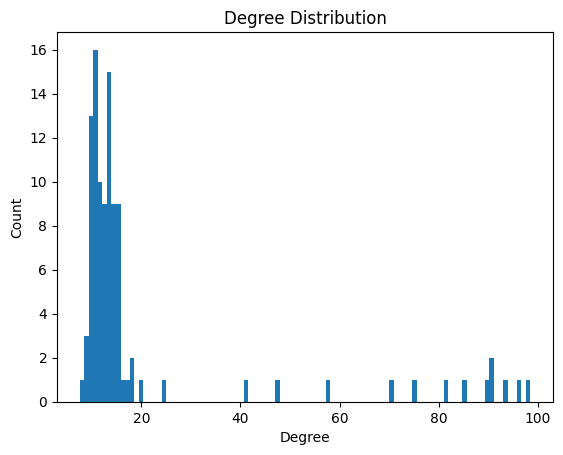

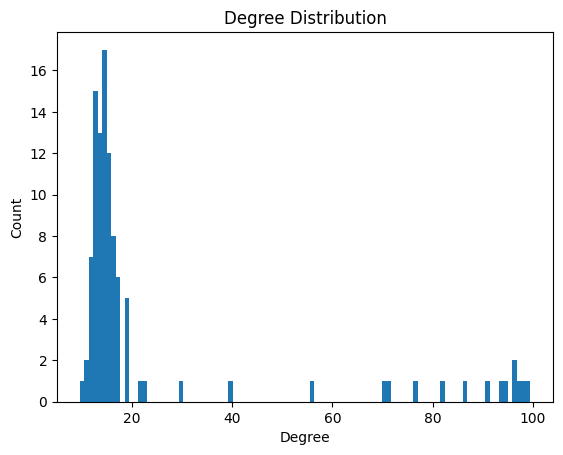

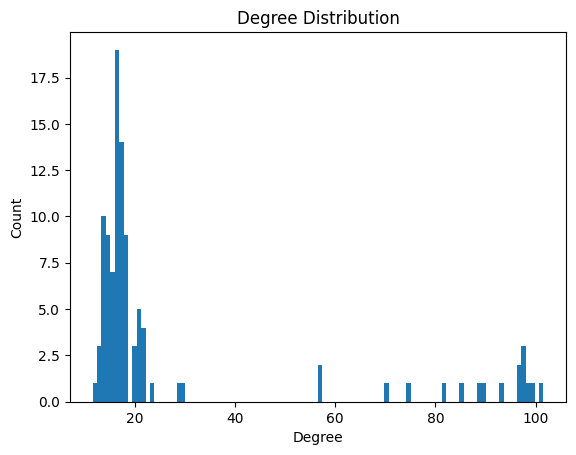

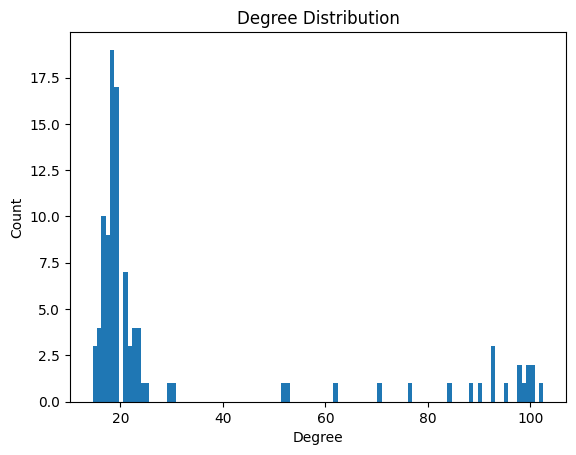

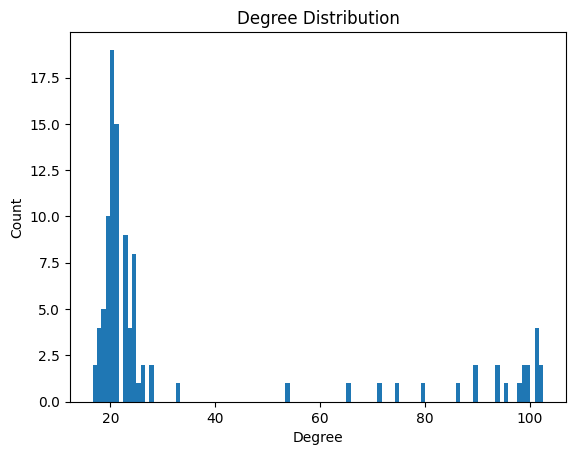

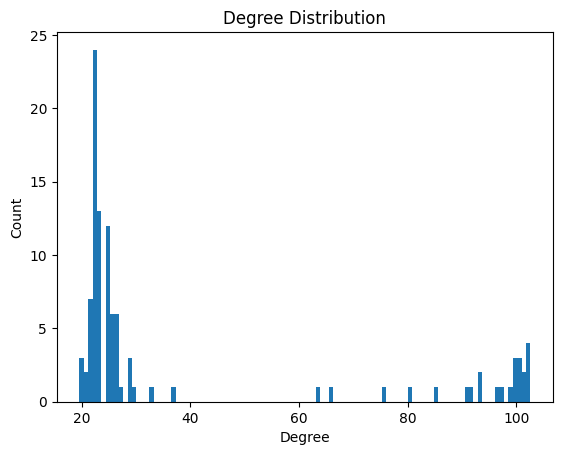

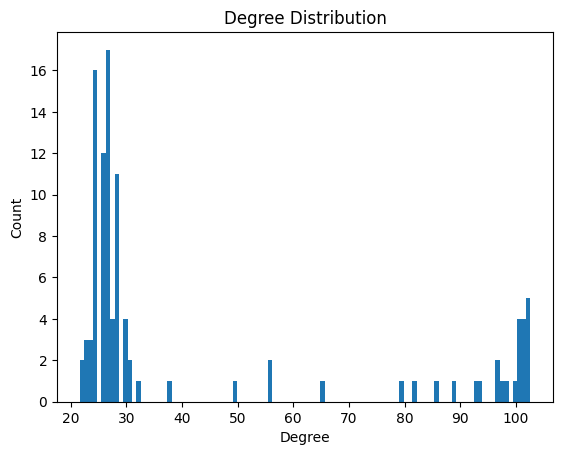

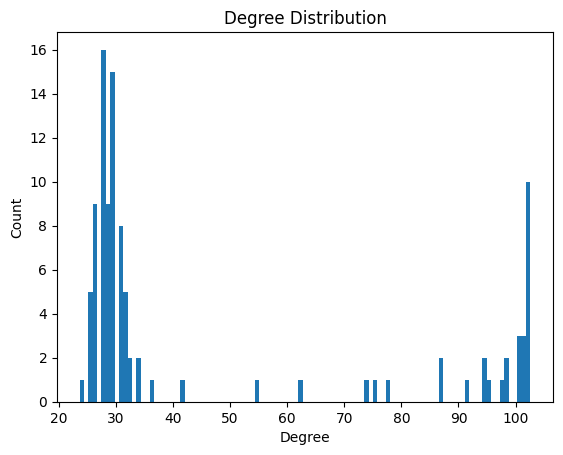

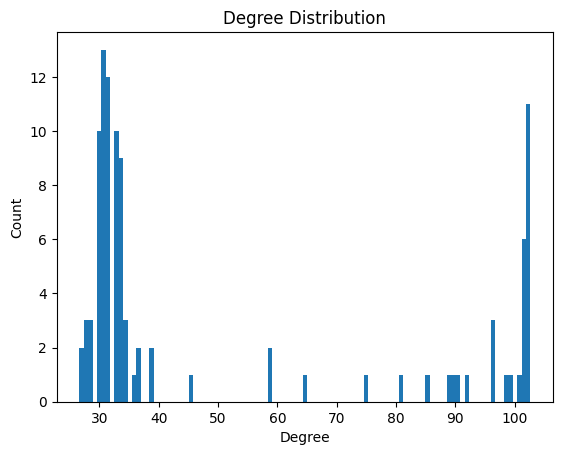

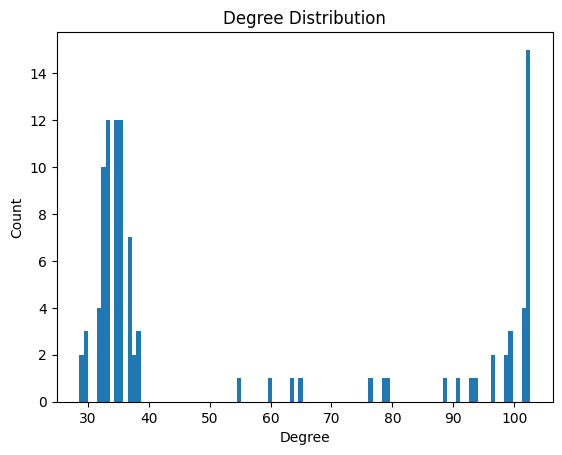

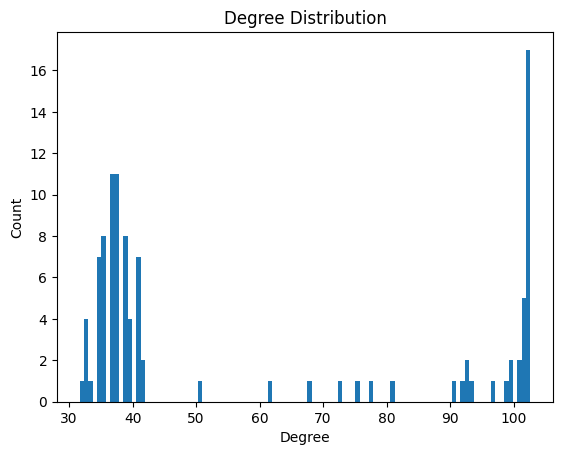

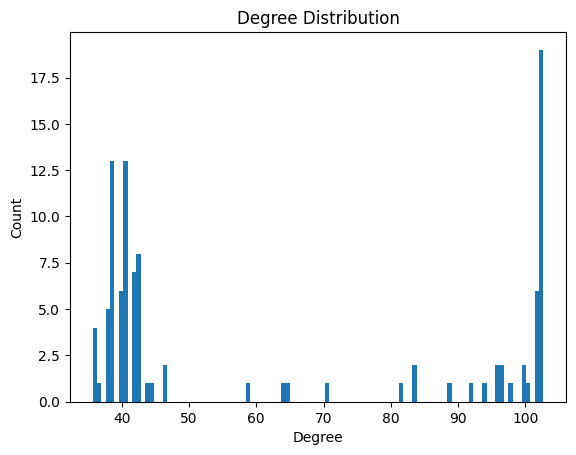

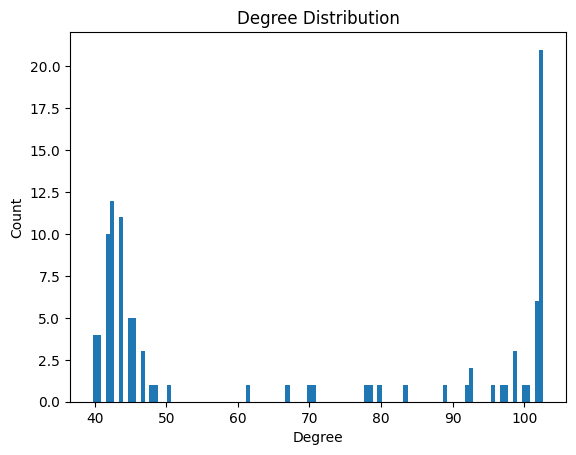

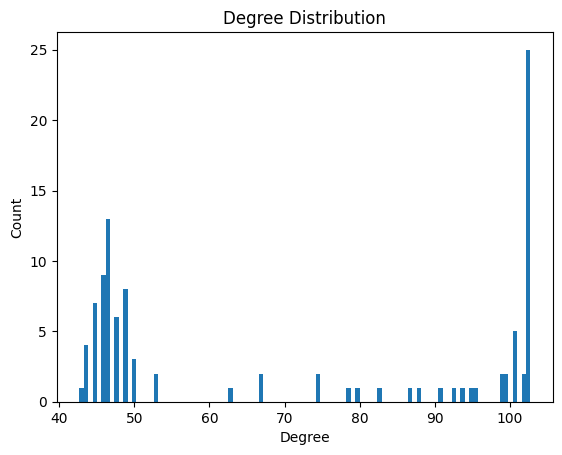

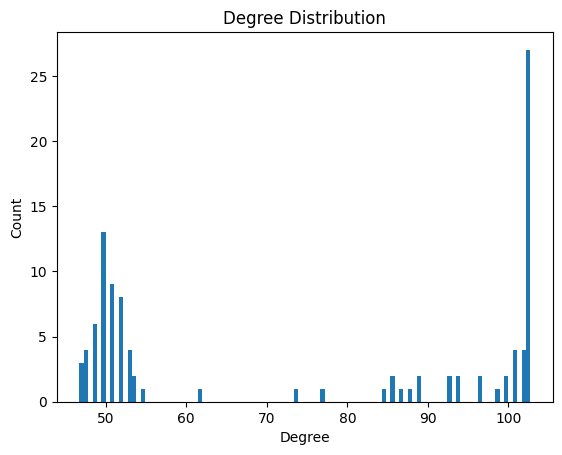

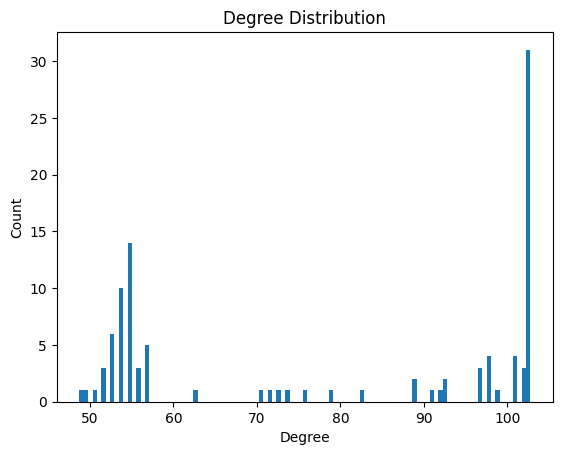

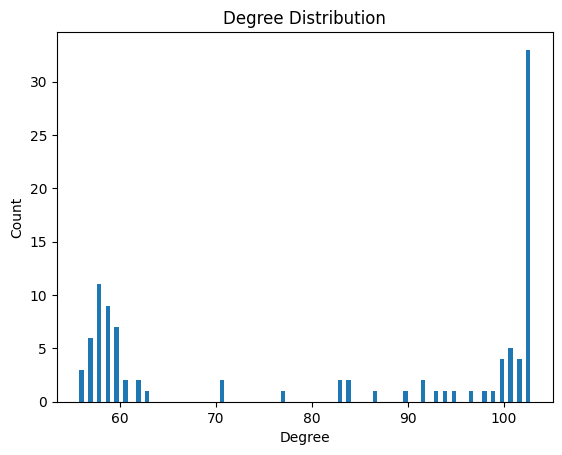

after_w.html


In [18]:
gForWeakness = initGraph()
P_W = 0.1
W_T = 0.2

for i in range(100):
    addVertexBA(gForWeakness)

plotDegreeDist(gForWeakness)

drawNetwork(gForWeakness, "before_w")
for _ in range(20):
   weakify(gForWeakness, P_W, expProb, 200)

   plotDegreeDist(gForWeakness)

drawNetwork(gForWeakness, "after_w")